In [1]:
import pandas as pd
boundaries_df_origin = pd.read_csv('G:/Alexis_data/Project/SpatialOmics_cellpose/results/segmenatation/1835os/cellpose_cell_boundaries_1835os.csv')
print("Data boundaries table file successfully")

boundaries_df_origin

Data boundaries table file successfully


,cell_id,vertex_x,vertex_y
0,1,17354,6019
1,1,17354,6021
2,1,17353,6023
3,1,17353,6025
4,1,17353,6027
...,...,...,...
101271,2115,14637,18498
101272,2115,14635,18500
101273,2115,14633,18501
101274,2115,14633,18503


In [2]:
boundaries_df = boundaries_df_origin

In [3]:
# Apply rescaling factor to vertex_x and vertex_y
rescale_factor = 0.2125
boundaries_df['vertex_x'] = boundaries_df['vertex_x'] * rescale_factor
boundaries_df['vertex_y'] = boundaries_df['vertex_y'] * rescale_factor

In [4]:
boundaries_df

,cell_id,vertex_x,vertex_y
0,1,3687.7250,1279.0375
1,1,3687.7250,1279.4625
2,1,3687.5125,1279.8875
3,1,3687.5125,1280.3125
4,1,3687.5125,1280.7375
...,...,...,...
101271,2115,3110.3625,3930.8250
101272,2115,3109.9375,3931.2500
101273,2115,3109.5125,3931.4625
101274,2115,3109.5125,3931.8875


In [5]:
# Assuming transcripts_assigned_ture is your DataFrame
output_path = "G:/Alexis_data/Project/SpatialOmics_cellpose/results/segmenatation/1835os/1835os_cell_boundaries.csv"

# Save the DataFrame as a Parquet file
boundaries_df.to_csv(output_path, index=False)

print(f"DataFrame saved successfully to {output_path}")

DataFrame saved successfully to G:/Alexis_data/Project/SpatialOmics_cellpose/results/segmenatation/1835os/1835os_cell_boundaries.csv


In [6]:
# Read Xenium transcripts output
# Read in the parquet file, edit path to where parquet file saved
transcripts_original = pd.read_parquet('G:/Alexis_data/Project/SpatialOmics_cellpose/data/output-XETG00245__0034182__1835os__20240613__195055/transcripts.parquet')

# Print information about the data frame
transcripts_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4204248 entries, 0 to 4204247
Data columns (total 11 columns):
 #   Column            Dtype  
---  ------            -----  
 0   transcript_id     uint64 
 1   cell_id           object 
 2   overlaps_nucleus  uint8  
 3   feature_name      object 
 4   x_location        float32
 5   y_location        float32
 6   z_location        float32
 7   qv                float32
 8   fov_name          object 
 9   nucleus_distance  float32
 10  codeword_index    int32  
dtypes: float32(5), int32(1), object(3), uint64(1), uint8(1)
memory usage: 228.5+ MB


In [7]:
transcripts_original

,transcript_id,cell_id,overlaps_nucleus,feature_name,x_location,y_location,z_location,qv,fov_name,nucleus_distance,codeword_index
0,281500746521421,UNASSIGNED,0,Serpina3n,200.314865,733.898987,11.759264,40.000000,B5,311.765656,130
1,281500746529427,UNASSIGNED,0,Trpv4,129.468964,747.453796,11.967684,40.000000,B5,356.643372,421
2,281500746529596,UNASSIGNED,0,Angpt2,198.384552,736.574768,11.702708,40.000000,B5,311.217834,123
3,281500746530917,UNASSIGNED,0,Gpihbp1,233.555542,731.658691,11.873324,40.000000,B5,291.241486,81
4,281500746523938,UNASSIGNED,0,Cldn7,10.488412,923.108826,12.020103,8.141578,B5,320.302399,397
...,...,...,...,...,...,...,...,...,...,...,...
4204243,281608120698344,UNASSIGNED,0,Col17a1,4014.480957,4339.616211,13.966164,40.000000,F11,226.622452,379
4204244,281608120698409,UNASSIGNED,0,Scin,4077.506592,4308.195312,14.044783,29.811825,F11,194.475266,384
4204245,281608120698535,UNASSIGNED,0,Rho,4179.107422,4281.516113,13.973914,14.034451,F11,210.258911,399
4204246,281608120698593,UNASSIGNED,0,Trim29,4024.249512,4268.646973,13.965784,40.000000,F11,155.000870,122


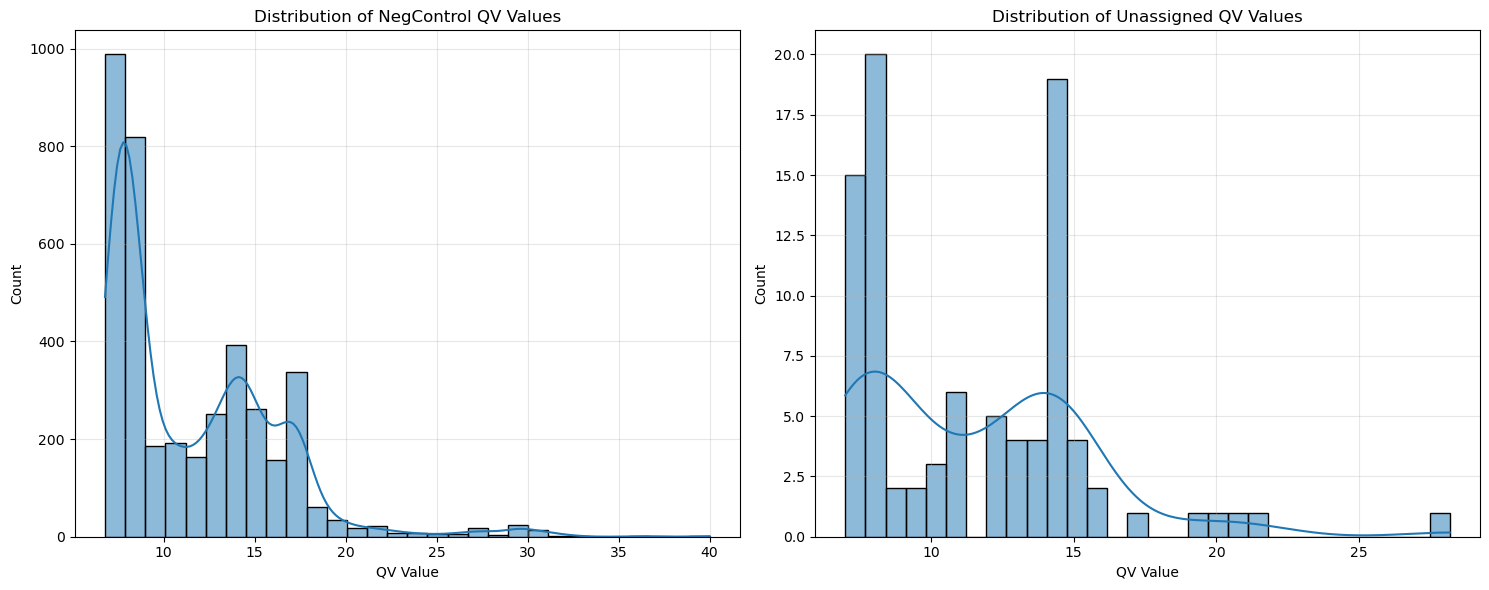

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Split data into two dataframes based on feature name prefixes
neg_control_df = transcripts_original[transcripts_original['feature_name'].str.startswith('NegControlCodeword')]
unassigned_df = transcripts_original[transcripts_original['feature_name'].str.startswith('UnassignedCodeword')]

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot NegControl distribution
sns.histplot(data=neg_control_df, x='qv', bins=30, kde=True, ax=ax1)
ax1.set_title('Distribution of NegControl QV Values')
ax1.set_xlabel('QV Value')
ax1.set_ylabel('Count')
ax1.grid(True, alpha=0.3)

# Plot Unassigned distribution
sns.histplot(data=unassigned_df, x='qv', bins=30, kde=True, ax=ax2)
ax2.set_title('Distribution of Unassigned QV Values')
ax2.set_xlabel('QV Value')
ax2.set_ylabel('Count')
ax2.grid(True, alpha=0.3)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

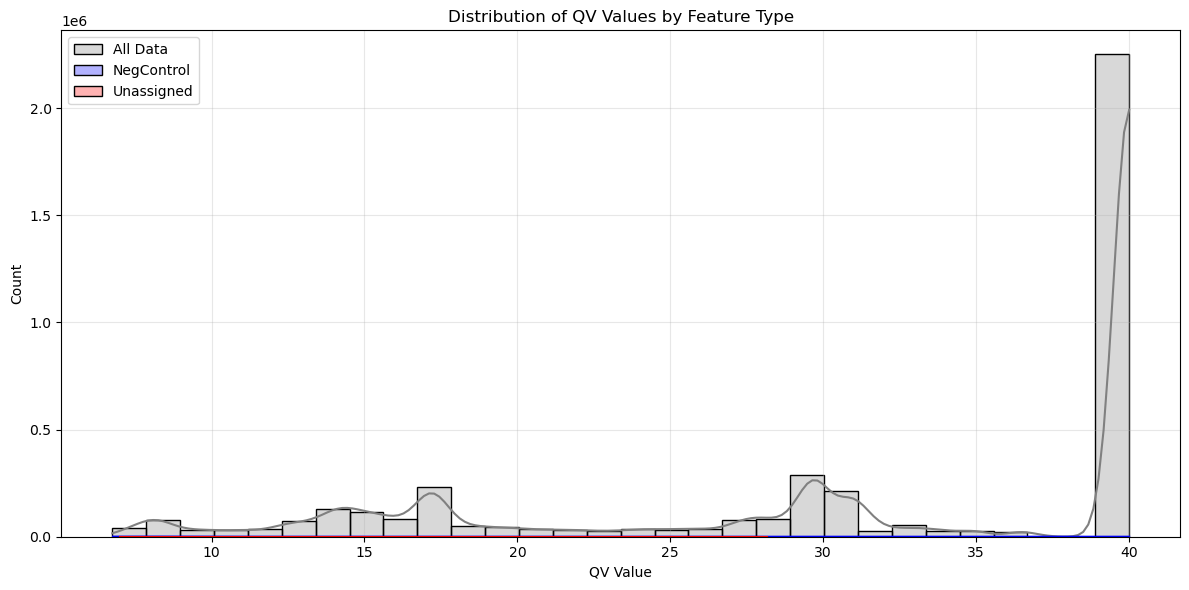

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure
plt.figure(figsize=(12, 6))

# Plot all three distributions with different colors
sns.histplot(data=transcripts_original, x='qv', bins=30, kde=True, color='gray', alpha=0.3, label='All Data')
sns.histplot(data=transcripts_original[transcripts_original['feature_name'].str.startswith('NegControlCodeword')], 
             x='qv', bins=30, kde=True, color='blue', alpha=0.3, label='NegControl')
sns.histplot(data=transcripts_original[transcripts_original['feature_name'].str.startswith('UnassignedCodeword')], 
             x='qv', bins=30, kde=True, color='red', alpha=0.3, label='Unassigned')

# Customize the plot
plt.title('Distribution of QV Values by Feature Type')
plt.xlabel('QV Value')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)
plt.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

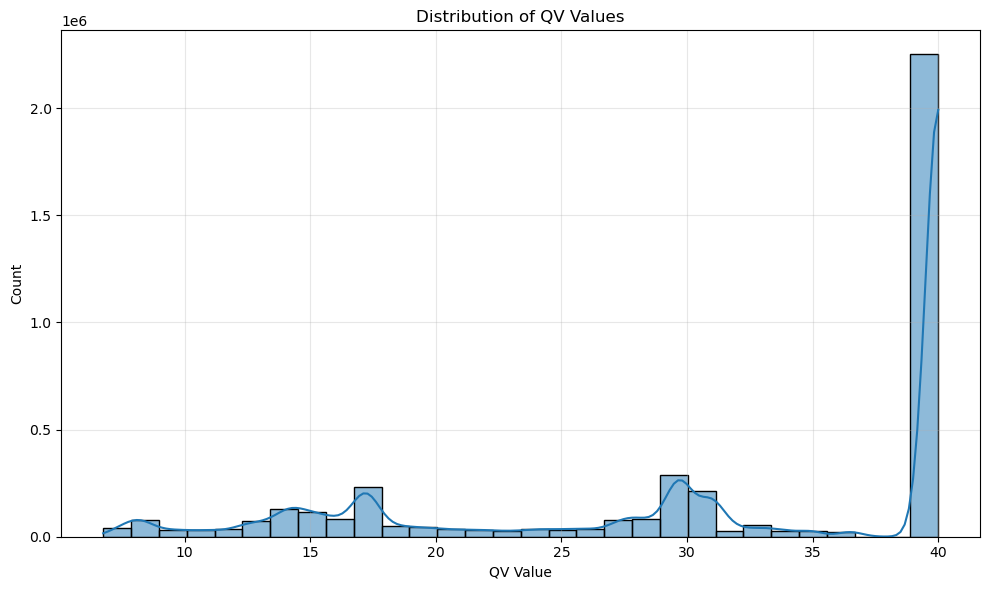

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with a specific size
plt.figure(figsize=(10, 6))

# Create distribution plot using seaborn
sns.histplot(data=transcripts_original, x='qv', bins=30, kde=True)

# Customize the plot
plt.title('Distribution of QV Values')
plt.xlabel('QV Value')
plt.ylabel('Count')

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


Distribution plot for negtive control

In [35]:
# Filter transcripts with qv score > 20
transcripts_filtered = transcripts_original[transcripts_original['qv'] > 20]

# Print information about the filtered dataframe
print("Original number of transcripts:", len(transcripts_original))
print("Number of transcripts after filtering (qv > 20):", len(transcripts_filtered))
print("\nPercentage of transcripts retained:", 
      round(len(transcripts_filtered) / len(transcripts_original) * 100, 2), "%")

# Display first few rows of filtered dataframe
print("\nFirst few rows of filtered data:")
print(transcripts_filtered.head())

Original number of transcripts: 4204248
Number of transcripts after filtering (qv > 20): 3265572

Percentage of transcripts retained: 77.67 %

First few rows of filtered data:
     transcript_id     cell_id  overlaps_nucleus feature_name  x_location  \
0  281500746521421  UNASSIGNED                 0    Serpina3n  200.314865   
1  281500746529427  UNASSIGNED                 0        Trpv4  129.468964   
2  281500746529596  UNASSIGNED                 0       Angpt2  198.384552   
3  281500746530917  UNASSIGNED                 0      Gpihbp1  233.555542   
5  281500746526443  UNASSIGNED                 0       Angpt2   78.252075   

   y_location  z_location    qv fov_name  nucleus_distance  codeword_index  
0  733.898987   11.759264  40.0       B5        311.765656             130  
1  747.453796   11.967684  40.0       B5        356.643372             421  
2  736.574768   11.702708  40.0       B5        311.217834             123  
3  731.658691   11.873324  40.0       B5        291.2

In [36]:
transcripts_b4_assign = transcripts_filtered


In [37]:
import pandas as pd
from shapely.geometry import Point, Polygon

# Load the polygon coordinates from CSV
polygon_coords_csv = r'G:/Alexis_data/Project/SpatialOmics_cellpose/data/output-XETG00245__0034182__1835os__20240613__195055/1835os_corneasection.csv'
polygon_coords = pd.read_csv(polygon_coords_csv)

# Extract the X and Y coordinates and create a polygon
x_coords = polygon_coords['X']
y_coords = polygon_coords['Y']
polygon = Polygon(zip(x_coords, y_coords))

# Load the transcripts data
transcripts_b4_cut = transcripts_b4_assign


# Initialize a counter
processed_count = 0

# Filter transcripts to retain only those within the polygon
def is_inside_polygon(row):
    global processed_count
    point = Point(row["x_location"], row["y_location"])
    processed_count += 1
    if processed_count % 10000 == 0:  # Print every 100 rows processed
        print(f"Processed {processed_count} transcripts...")
    return polygon.contains(point)

transcripts_filtered = transcripts_b4_cut[
    transcripts_b4_cut.apply(is_inside_polygon, axis=1)
]

Processed 10000 transcripts...
Processed 20000 transcripts...
Processed 30000 transcripts...
Processed 40000 transcripts...
Processed 50000 transcripts...
Processed 60000 transcripts...
Processed 70000 transcripts...
Processed 80000 transcripts...
Processed 90000 transcripts...
Processed 100000 transcripts...
Processed 110000 transcripts...
Processed 120000 transcripts...
Processed 130000 transcripts...
Processed 140000 transcripts...
Processed 150000 transcripts...
Processed 160000 transcripts...
Processed 170000 transcripts...
Processed 180000 transcripts...
Processed 190000 transcripts...
Processed 200000 transcripts...
Processed 210000 transcripts...
Processed 220000 transcripts...
Processed 230000 transcripts...
Processed 240000 transcripts...
Processed 250000 transcripts...
Processed 260000 transcripts...
Processed 270000 transcripts...
Processed 280000 transcripts...
Processed 290000 transcripts...
Processed 300000 transcripts...
Processed 310000 transcripts...
Processed 320000 

In [12]:
transcripts_assigned = transcripts_filtered
cell_boundaries = boundaries_df
transcripts_assigned

,transcript_id,cell_id,overlaps_nucleus,feature_name,x_location,y_location,z_location,qv,fov_name,nucleus_distance,codeword_index
1983145,281616710631614,igoacopk-1,0,Anxa2,1929.679443,3913.320557,15.435079,22.777649,F8,0.757938,171
1983161,281616710631630,UNASSIGNED,0,Kdr,1935.741577,3918.873535,13.727287,40.000000,F8,2.337319,199
1983170,281616710631639,igohojbi-1,0,Anxa2,1941.406006,3898.710938,22.634285,40.000000,F8,1.918457,171
1983173,281616710631642,UNASSIGNED,0,Gm13889,1942.388306,3918.603027,14.331815,40.000000,F8,4.220665,334
1983177,281616710631651,ignoldjo-1,0,Ifitm3,1945.776733,3919.022217,12.951881,21.529461,F8,1.261483,424
...,...,...,...,...,...,...,...,...,...,...,...
4204081,281582351003456,UNASSIGNED,0,Krt6b,4095.110352,3297.378662,14.408321,27.321392,E11,104.323906,430
4204084,281582350894799,UNASSIGNED,0,Cryab,4030.293213,3510.451172,14.255648,40.000000,E11,181.225372,180
4204101,281582350918008,UNASSIGNED,0,Slurp1,4003.184814,3517.509033,14.164782,30.916903,E11,165.885757,436
4204102,281582350918010,UNASSIGNED,0,Slurp1,4003.979492,3517.342529,14.185933,31.023624,E11,166.450272,436


In [13]:
cell_boundaries = boundaries_df


In [14]:
import pandas as pd
from shapely.geometry import Point, Polygon
from rtree import index

# Create R-Tree spatial index and polygons
spatial_index = index.Index()
cell_polygons = {}

for cell_id, group in cell_boundaries.groupby("cell_id"):
    polygon = Polygon(zip(group["vertex_x"], group["vertex_y"]))
    cell_polygons[cell_id] = polygon
    spatial_index.insert(cell_id, polygon.bounds)

# Initialize a counter
processed_count = 0

# Optimized function to find the cell_id for a given x, y location
def find_cell_id_optimized(x, y):
    global processed_count
    point = Point(x, y)
    possible_matches = list(spatial_index.intersection((x, y, x, y)))
    for cell_id in possible_matches:
        if cell_polygons[cell_id].contains(point):
            return cell_id
    return "UNASSIGNED"

# Modified function to handle progress tracking with R-Tree
def process_with_progress(transcripts_df):
    global processed_count
    results = []
    for index, row in transcripts_df.iterrows():
        cell_id = find_cell_id_optimized(row["x_location"], row["y_location"])
        results.append(cell_id)
        processed_count += 1
        if processed_count % 10000 == 0:  # Print every 1000 rows processed
            print(f"Processed {processed_count} transcripts...")
    return results

# Assign cell_id with progress tracking
transcripts_assigned["cell_id"] = process_with_progress(transcripts_assigned)

print("Processing complete!")


Processed 10000 transcripts...
Processed 20000 transcripts...
Processed 30000 transcripts...
Processed 40000 transcripts...
Processed 50000 transcripts...
Processed 60000 transcripts...
Processed 70000 transcripts...
Processed 80000 transcripts...
Processed 90000 transcripts...
Processed 100000 transcripts...
Processed 110000 transcripts...
Processed 120000 transcripts...
Processed 130000 transcripts...
Processed 140000 transcripts...
Processed 150000 transcripts...
Processed 160000 transcripts...
Processed 170000 transcripts...
Processed 180000 transcripts...
Processed 190000 transcripts...
Processed 200000 transcripts...
Processed 210000 transcripts...
Processed 220000 transcripts...
Processed 230000 transcripts...
Processed 240000 transcripts...
Processed 250000 transcripts...
Processed 260000 transcripts...
Processed 270000 transcripts...
Processed 280000 transcripts...
Processed 290000 transcripts...
Processed 300000 transcripts...
Processed 310000 transcripts...
Processed 320000 

C:\Users\Alexis\AppData\Local\Temp\ipykernel_115400\146154260.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transcripts_assigned["cell_id"] = process_with_progress(transcripts_assigned)


In [38]:
# Filter rows where cell_id is not "UNASSIGNED"
transcripts_assigned_ture = transcripts_assigned[transcripts_assigned["cell_id"] != "UNASSIGNED"]

# Display the result
transcripts_assigned_ture
  
# save as parquet
# G:\Alexis_data\Project\Cellpose_seg\csv_output

,transcript_id,cell_id,overlaps_nucleus,feature_name,x_location,y_location,z_location,qv,fov_name,nucleus_distance,codeword_index
1983145,281616710631614,917,0,Anxa2,1929.679443,3913.320557,15.435079,22.777649,F8,0.757938,171
1983186,281616710631663,921,1,Xbp1,1948.388550,3915.492676,11.991734,40.000000,F8,0.000000,416
1983206,281616710631701,876,0,Fibin,1955.675415,3890.491699,12.885477,40.000000,F8,0.152953,145
1983209,281616710631704,876,1,Fech,1956.487549,3889.821289,14.450640,40.000000,F8,0.000000,234
1983212,281616710631710,913,0,Ifitm3,1956.828735,3915.479248,14.043561,24.132998,F8,1.765131,424
...,...,...,...,...,...,...,...,...,...,...,...
4203929,281582350962899,1381,0,Krt15,4001.653809,3252.202881,15.506276,40.000000,E11,0.992976,465
4203992,281582350974314,1381,0,Prss23,4001.436279,3251.562256,17.667377,25.462420,E11,0.411034,366
4203993,281582350976737,1381,1,S100a14,4000.719727,3251.329102,16.139893,29.735250,E11,0.000000,173
4204036,281582350992792,1381,1,Aqp3,4000.267578,3250.590332,20.470612,40.000000,E11,0.000000,191


In [39]:
transcripts_assigned_ture

,transcript_id,cell_id,overlaps_nucleus,feature_name,x_location,y_location,z_location,qv,fov_name,nucleus_distance,codeword_index
1983145,281616710631614,917,0,Anxa2,1929.679443,3913.320557,15.435079,22.777649,F8,0.757938,171
1983186,281616710631663,921,1,Xbp1,1948.388550,3915.492676,11.991734,40.000000,F8,0.000000,416
1983206,281616710631701,876,0,Fibin,1955.675415,3890.491699,12.885477,40.000000,F8,0.152953,145
1983209,281616710631704,876,1,Fech,1956.487549,3889.821289,14.450640,40.000000,F8,0.000000,234
1983212,281616710631710,913,0,Ifitm3,1956.828735,3915.479248,14.043561,24.132998,F8,1.765131,424
...,...,...,...,...,...,...,...,...,...,...,...
4203929,281582350962899,1381,0,Krt15,4001.653809,3252.202881,15.506276,40.000000,E11,0.992976,465
4203992,281582350974314,1381,0,Prss23,4001.436279,3251.562256,17.667377,25.462420,E11,0.411034,366
4203993,281582350976737,1381,1,S100a14,4000.719727,3251.329102,16.139893,29.735250,E11,0.000000,173
4204036,281582350992792,1381,1,Aqp3,4000.267578,3250.590332,20.470612,40.000000,E11,0.000000,191


In [40]:
import pandas as pd

# Assuming transcripts_assigned_ture is your DataFrame
output_path = r"G:\Alexis_data\Project\SpatialOmics_cellpose\results\gene_expression_matrix\1835os\transcripts_assigned_ture.parquet"

# Save the DataFrame as a Parquet file
transcripts_assigned_ture.to_parquet(output_path, engine='pyarrow', index=False)

print(f"DataFrame saved successfully to {output_path}")


DataFrame saved successfully to G:\Alexis_data\Project\SpatialOmics_cellpose\results\gene_expression_matrix\1835os\transcripts_assigned_ture.parquet


In [41]:
import pandas as pd
centroids_df_origin = pd.read_csv('G:/Alexis_data/Project/SpatialOmics_cellpose/results/segmenatation/1835os/cellpose_cell_centroids_1835os.csv')
print("Data centroids table file successfully")

Data centroids table file successfully


In [42]:
centroids_df = centroids_df_origin

In [20]:
# Apply rescaling factor to vertex_x and vertex_y
rescale_factor = 0.2125
centroids_df['centroid_x'] = centroids_df['centroid_x'] * rescale_factor
centroids_df['centroid_y'] = centroids_df['centroid_y'] * rescale_factor

In [21]:
centroids_df

,cell_id,centroid_x,centroid_y
0,1,3688.720395,1280.513816
1,2,3692.111607,1296.120982
2,3,3702.794022,1299.211141
3,4,3708.883929,1306.007653
4,5,3690.098670,1306.269149
...,...,...,...
2047,2048,3187.015500,4038.358500
2048,2049,3247.200000,4056.837500
2049,2050,3253.445833,4065.509524
2050,2051,3274.425000,4065.062500


In [43]:
import pandas as pd

# Sample dataframes for transcripts and centroids
# transcripts_data = pd.DataFrame({
#     "transcript_id": [281522221350970, 281522221350974, 281522221350975, 281522221350986, 281522221350989],
#     "cell_id": [232, 232, 232, 111, 111],
#     "feature_name": ["Anxa2", "Anxa2", "Anxa2", "Muc1", "Ifitm3"],
#     "x_location": [245.805267, 246.821533, 247.207596, 248.995178, 249.137848],
#     "y_location": [1219.056519, 1209.969238, 1221.098267, 1207.783936, 1204.738770],
#     "z_location": [13.080562, 13.002655, 14.660634, 15.641087, 12.257559]
# })

transcripts_data = transcripts_assigned_ture


# Create a pivot table for the gene expression matrix
gene_expression_matrix = (
    transcripts_data.groupby(["cell_id", "feature_name"])
    .size()
    .unstack(fill_value=0)
    .reset_index()
)


# Add total counts column

gene_expression_matrix["Total Counts"] = gene_expression_matrix.drop(columns=["cell_id"]).sum(axis=1)

# Merge with centroids to add centroid coordinates
gene_expression_matrix = pd.merge(
    centroids_df,
    gene_expression_matrix,
    how="left",
    on="cell_id"
)

In [44]:
gene_expression_matrix

,cell_id,centroid_x,centroid_y,0610005C13Rik,1110017D15Rik,2610528A11Rik,6330403K07Rik,A330076H08Rik,AU021092,Aadat,...,Upk1b,Upk3b,Vip,Vsnl1,Vsx2,Vwf,Wif1,Wnt3,Xbp1,Total Counts
0,1,17358.684211,6025.947368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
1,2,17374.642857,6099.392857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0
2,3,17424.913043,6113.934783,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,83.0
3,4,17453.571429,6145.918367,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,142.0
4,5,17365.170213,6147.148936,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2110,2111,14854.000000,18385.020000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2111,2112,14864.780000,18408.440000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2112,2113,14776.280000,18438.660000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2113,2114,14717.160000,18454.020000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
# Get columns after the 4th column
later_columns = gene_expression_matrix.columns[1:]

In [46]:
# Fill empty values with 0 for all columns after column 4
gene_expression_matrix[later_columns] = gene_expression_matrix[later_columns].fillna(0)

# Verify the changes
print("\nChecking if there are still any empty values:")
print(gene_expression_matrix[later_columns].isna().sum())

# Display a few rows to verify the changes
print("\nFirst few rows after filling empty values:")
print(gene_expression_matrix.head())


Checking if there are still any empty values:
centroid_x       0
centroid_y       0
0610005C13Rik    0
1110017D15Rik    0
2610528A11Rik    0
                ..
Vwf              0
Wif1             0
Wnt3             0
Xbp1             0
Total Counts     0
Length: 466, dtype: int64

First few rows after filling empty values:
   cell_id    centroid_x   centroid_y  0610005C13Rik  1110017D15Rik  \
0        1  17358.684211  6025.947368            0.0            0.0   
1        2  17374.642857  6099.392857            0.0            0.0   
2        3  17424.913043  6113.934783            0.0            0.0   
3        4  17453.571429  6145.918367            0.0            0.0   
4        5  17365.170213  6147.148936            0.0            0.0   

   2610528A11Rik  6330403K07Rik  A330076H08Rik  AU021092  Aadat  ...  Upk1b  \
0            0.0            0.0            0.0       0.0    0.0  ...    0.0   
1            0.0            0.0            0.0       0.0    0.0  ...    0.0   
2         

In [47]:
import pandas as pd

# Assuming transcripts_assigned_ture is your DataFrame
output_path = r"G:\Alexis_data\Project\SpatialOmics_cellpose\results\gene_expression_matrix\1835os\1835os_gene_expression_matrix.csv"

# Save the DataFrame as a Parquet file
gene_expression_matrix.to_csv(output_path, index=False)

print(f"DataFrame saved successfully to {output_path}")

DataFrame saved successfully to G:\Alexis_data\Project\SpatialOmics_cellpose\results\gene_expression_matrix\1835os\1835os_gene_expression_matrix.csv
